<a href="https://colab.research.google.com/github/daneelsan/INF648-Project/blob/main/notebooks/Ronaldo_Tunque_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

# 1. Ejecución de Modelos

In [9]:
# Cargar el archivo csv con los datos
url_data_path = "https://raw.githubusercontent.com/daneelsan/INF648-Project/main/dataset/sgemm_product.csv"
data = pd.read_csv(url_data_path)

In [10]:
# Las últimas cuatro columnas son las variables objetivo (Run1 (ms), Run2 (ms), Run3 (ms), Run4 (ms))
# Crear una variable objetivo única como el logaritmo del promedio de estos tiempos de ejecución
data['average_run'] = data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)
data['log_average_run'] = np.log(data['average_run'])

In [11]:
# Eliminar las columnas de tiempos de ejecución originales y la columna 'average_run'
data = data.drop(columns=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)', 'average_run'])

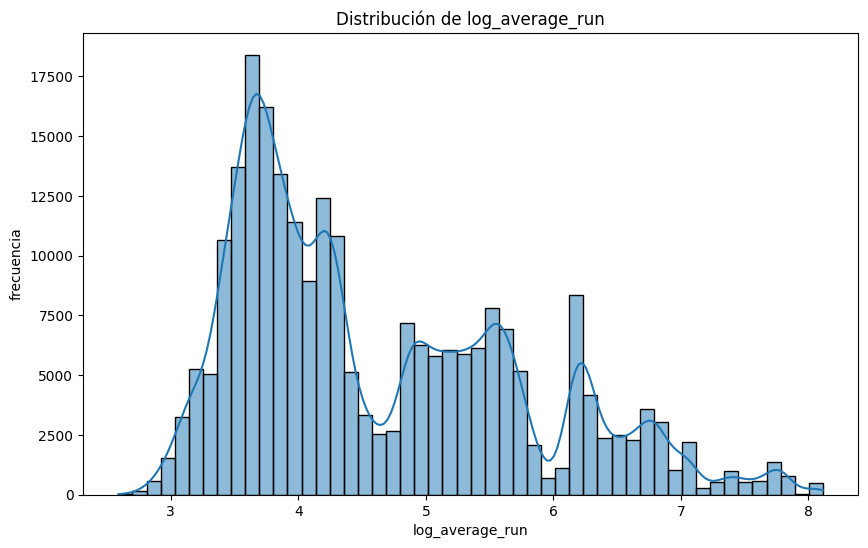

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['log_average_run'], bins=50, kde=True)
plt.title('Distribución de log_average_run')
plt.xlabel('log_average_run')
plt.ylabel('frecuencia')
plt.show()

In [17]:
# Características y objetivo
X = data.drop(columns=['log_average_run'])
y = data['log_average_run']

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Características y objetivo
X = data.drop(columns=['log_average_run'])
y = data['log_average_run']

In [20]:
#Función para graficar resultados
def plot_model_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(title)
    plt.show()

## Regresión Lineal

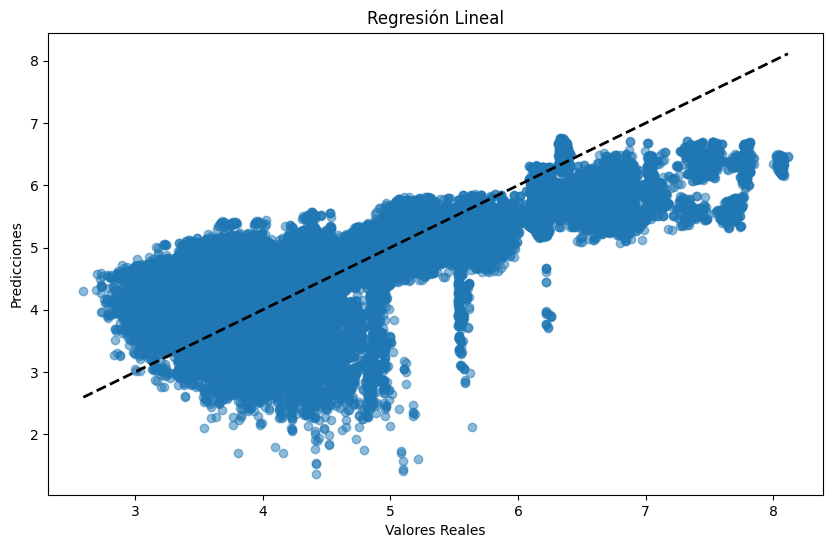

Error cuadrático medio (entrenamiento): 0.5591461445465076
Error cuadrático medio (prueba): 0.557585389196344
Coeficiente de determinación R^2 (entrenamiento): 0.5620506628562645
Coeficiente de determinación R^2 (prueba): 0.5577962484740586


In [23]:
# Crear un pipeline para la regresión lineal
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_test_lineal = pipeline.predict(X_test)

# Calcular el MSE y R^2
mse_lineal_test = mean_squared_error(y_test, y_pred_test_lineal)
r2_lineal_test = r2_score(y_test, y_pred_test_lineal)

# Predicciones en el conjunto de entrenamiento
y_pred_train_lineal = pipeline.predict(X_train)

# Calcular el MSE y R^2
mse_lineal_train = mean_squared_error(y_train, y_pred_train_lineal)
r2_lineal_train = r2_score(y_train, y_pred_train_lineal)

plot_model_predictions(y_test, y_pred_test_lineal, 'Regresión Lineal')

print("Error cuadrático medio (entrenamiento):", mse_lineal_train)
print("Error cuadrático medio (prueba):", mse_lineal_test)
print("Coeficiente de determinación R^2 (entrenamiento):", r2_lineal_train)
print("Coeficiente de determinación R^2 (prueba):", r2_lineal_test)

## Regresión Ridge

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..................ridge__alpha=0.1;, score=0.565 total time=   0.2s
[CV 2/5] END ..................ridge__alpha=0.1;, score=0.561 total time=   0.2s
[CV 3/5] END ..................ridge__alpha=0.1;, score=0.563 total time=   0.2s
[CV 4/5] END ..................ridge__alpha=0.1;, score=0.555 total time=   0.3s
[CV 5/5] END ..................ridge__alpha=0.1;, score=0.566 total time=   0.4s
[CV 1/5] END ..................ridge__alpha=1.0;, score=0.565 total time=   0.3s
[CV 2/5] END ..................ridge__alpha=1.0;, score=0.561 total time=   0.2s
[CV 3/5] END ..................ridge__alpha=1.0;, score=0.563 total time=   0.2s
[CV 4/5] END ..................ridge__alpha=1.0;, score=0.555 total time=   0.3s
[CV 5/5] END ..................ridge__alpha=1.0;, score=0.566 total time=   0.2s
[CV 1/5] END .................ridge__alpha=10.0;, score=0.565 total time=   0.2s
[CV 2/5] END .................ridge__alpha=10.0;,

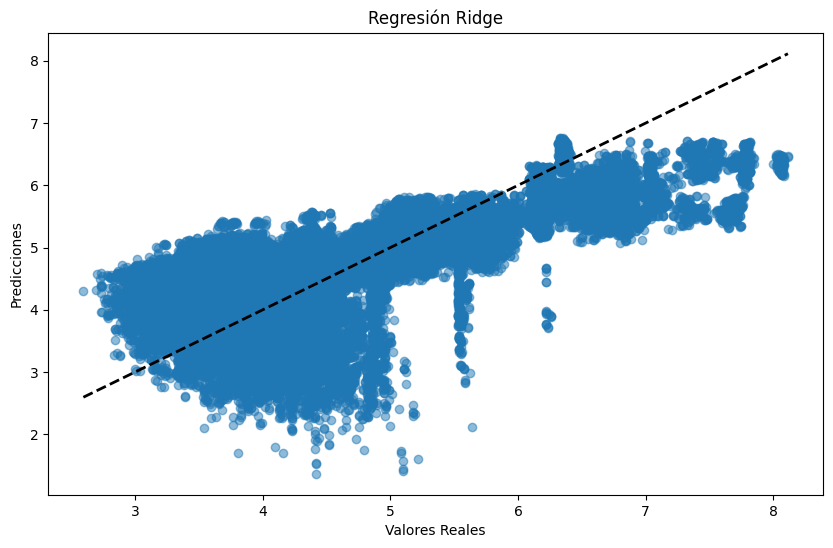

In [24]:
# Definir los parámetros para Grid Search
ridge_params = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Crear el pipeline para Ridge
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

# Crear GridSearchCV para Ridge
ridge_grid = GridSearchCV(ridge_pipeline, param_grid=ridge_params, cv=5, scoring='r2', verbose=3)
ridge_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_ridge_params = ridge_grid.best_params_
best_ridge_score = ridge_grid.best_score_

print("Mejores parámetros para Ridge:", best_ridge_params)
print("Mejor puntaje R² para Ridge:", best_ridge_score)

# Reentrenar Ridge con el mejor parámetro
best_ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=best_ridge_params['ridge__alpha']))
best_ridge_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_best_test_ridge = best_ridge_model.predict(X_test)

# Calcular el MSE y R^2
mse_ridge_test = mean_squared_error(y_test, y_pred_best_test_ridge)
r2_ridge_test = r2_score(y_test, y_pred_best_test_ridge)

# Predicciones en el conjunto de entrenamiento
y_pred_best_train_ridge = best_ridge_model.predict(X_train)

# Calcular el MSE y R^2
mse_ridge_train = mean_squared_error(y_train, y_pred_best_train_ridge)
r2_ridge_train = r2_score(y_train, y_pred_best_train_ridge)

print("Error cuadrático medio (entrenamiento):", mse_ridge_train)
print("Error cuadrático medio (prueba):", mse_ridge_test)
print("Coeficiente de determinación R^2 (entrenamiento):", r2_ridge_train)
print("Coeficiente de determinación R^2 (prueba):", r2_ridge_test)

plot_model_predictions(y_test, y_pred_best_test_ridge, 'Regresión Ridge')

## Regresión Lasso

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................lasso__alpha=0.001;, score=0.565 total time=   0.5s
[CV 2/5] END ................lasso__alpha=0.001;, score=0.561 total time=   0.4s
[CV 3/5] END ................lasso__alpha=0.001;, score=0.563 total time=   0.4s
[CV 4/5] END ................lasso__alpha=0.001;, score=0.555 total time=   0.3s
[CV 5/5] END ................lasso__alpha=0.001;, score=0.566 total time=   0.3s
[CV 1/5] END .................lasso__alpha=0.01;, score=0.564 total time=   0.4s
[CV 2/5] END .................lasso__alpha=0.01;, score=0.560 total time=   0.4s
[CV 3/5] END .................lasso__alpha=0.01;, score=0.562 total time=   0.5s
[CV 4/5] END .................lasso__alpha=0.01;, score=0.554 total time=   0.3s
[CV 5/5] END .................lasso__alpha=0.01;, score=0.564 total time=   0.4s
[CV 1/5] END ..................lasso__alpha=0.1;, score=0.504 total time=   0.4s
[CV 2/5] END ..................lasso__alpha=0.1;,

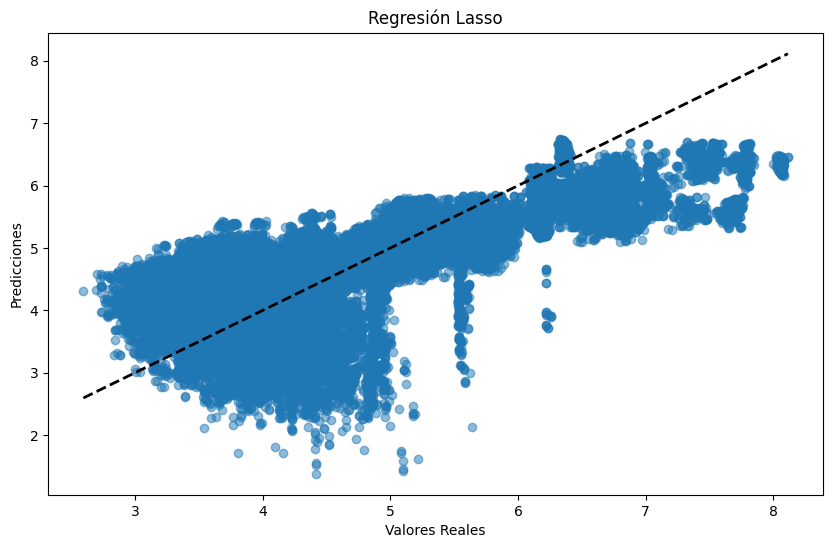

In [25]:
# Definir los parámetros para Grid Search
lasso_params = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Crear el pipeline para Lasso
lasso_pipeline = make_pipeline(StandardScaler(), Lasso())

# Crear GridSearchCV para Lasso
lasso_grid = GridSearchCV(lasso_pipeline, param_grid=lasso_params, cv=5, scoring='r2', verbose=3)
lasso_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_lasso_params = lasso_grid.best_params_
best_lasso_score = lasso_grid.best_score_

print("Mejores parámetros para Lasso:", best_lasso_params)
print("Mejor puntaje R² para Lasso:", best_lasso_score)

# Reentrenar Lasso con el mejor parámetro
best_lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=best_lasso_params['lasso__alpha']))
best_lasso_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_best_test_lasso = best_lasso_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lasso_test = mean_squared_error(y_test, y_pred_best_test_lasso)
r2_lasso_test = r2_score(y_test, y_pred_best_test_lasso)

# Predicciones en el conjunto de entrenamiento
y_pred_best_train_lasso = best_lasso_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lasso_train = mean_squared_error(y_train, y_pred_best_train_lasso)
r2_lasso_train = r2_score(y_train, y_pred_best_train_lasso)

print("Error cuadrático medio (entrenamiento):", mse_lasso_train)
print("Error cuadrático medio (prueba):", mse_lasso_test)
print("Coeficiente de determinación R^2 (entrenamiento):", r2_lasso_train)
print("Coeficiente de determinación R^2 (prueba):", r2_lasso_test)

plot_model_predictions(y_test, y_pred_best_test_lasso, 'Regresión Lasso')

## XGBoost

In [ ]:
# Definir los parámetros para Grid Search
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el pipeline para XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Crear GridSearchCV para XGBoost
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='r2', cv=5, n_jobs=-1, verbose=3)
xgb_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_xgb_params = xgb_grid.best_params_
best_xgb_score = xgb_grid.best_score_

print("Mejores parámetros para XGBoost:", best_xgb_params)
print("Mejor puntaje R² para XGBoost:", best_xgb_score)

# Reentrenar XGBoost con los mejores parámetros
best_xgb_model = xgb_grid.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_test_xgb = best_xgb_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_xgb_test = mean_squared_error(y_test, y_pred_best_test_xgb)
r2_xgb_test = r2_score(y_test, y_pred_best_test_xgb)

# Predicciones en el conjunto de entrenamiento
y_pred_best_train_xgb = best_xgb_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_xgb_train = mean_squared_error(y_train, y_pred_best_train_xgb)
r2_xgb_train = r2_score(y_train, y_pred_best_train_xgb)

print("Error cuadrático medio (entrenamiento):", mse_xgb_train)
print("Error cuadrático medio (prueba):", mse_xgb_test)
print("Coeficiente de determinación R^2 (entrenamiento):", r2_xgb_train)
print("Coeficiente de determinación R^2 (prueba):", r2_xgb_test)

plot_model_predictions(y_test, y_pred_best_test_xgb, 'XGBoost')

## LightGBM

In [ ]:
# Definir los parámetros para Grid Search
lgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'num_leaves': [20, 31, 40],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el pipeline para LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# Crear GridSearchCV para LightGBM
lgb_grid = GridSearchCV(estimator=lgb_model, param_grid=lgb_params, scoring='r2', cv=5, n_jobs=-1, verbose=3)
lgb_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_lgb_params = lgb_grid.best_params_
best_lgb_score = lgb_grid.best_score_

print("Mejores parámetros para LightGBM:", best_lgb_params)
print("Mejor puntaje R² para LightGBM:", best_lgb_score)

# Reentrenar LightGBM con los mejores parámetros
best_lgb_model = lgb_grid.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_test_lgb = best_lgb_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lgb_test = mean_squared_error(y_test, y_pred_best_test_lgb)
r2_lgb_test = r2_score(y_test, y_pred_best_test_lgb)

# Predicciones en el conjunto de entrenamiento
y_pred_best_train_lgb = best_lgb_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lgb_train = mean_squared_error(y_train, y_pred_best_train_lgb)
r2_lgb_train = r2_score(y_train, y_pred_best_train_lgb)

print("Error cuadrático medio (entrenamiento):", mse_lgb_train)
print("Error cuadrático medio (prueba):", mse_lgb_test)
print("Coeficiente de determinación R^2 (entrenamiento):", r2_lgb_train)
print("Coeficiente de determinación R^2 (prueba):", r2_lgb_test)

plot_model_predictions(y_test, y_pred_best_test_lgb, 'LightGBM')